In [26]:
from scipy import stats as st
from scipy.stats import chisquare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import plotly.figure_factory as ff


In [27]:
survey_raw = pd.read_csv("Raw_survey_data.csv")
survey_raw["dummy"] = [1]*1600
survey_raw = survey_raw.rename(columns = {'q4':'LOIF','q5':'LOTM','q8':'LOIT','q17':'House_Status','q18':'Household_Status','q19':'Grocery_Budget_Strictness','Age_Catagory' : 'Age_Category'},errors="raise")
cNames = list(survey_raw.columns.values)
checkList = ['Prefecture_code','TypeOfRes','Sex','Age','Age_Catagory','Sex_Era','Married','Profession','House_Status','Household_Status','Grocery_Budget_Strictness']
cur_pivot = survey_raw.pivot_table("dummy",index = "LOTM",columns = 'Grocery_Budget_Strictness',aggfunc = sum)
cur_pivot = cur_pivot.fillna(0)


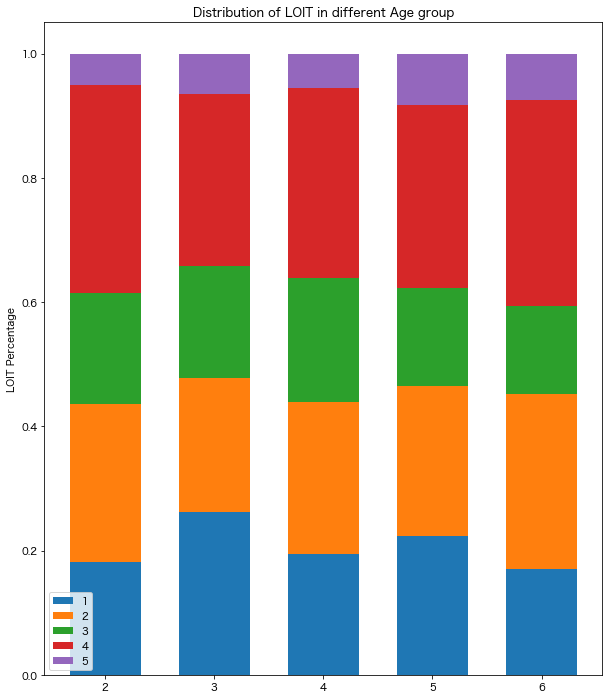

In [30]:
#------------------------------------------------------------------------#
#Anova on Age_Cate frequency                            #  
#------------------------------------------------------------------------#
Age_Catagory_LOTM = survey_raw.pivot_table("dummy",index = "LOIF",columns = "Age_Category" ,aggfunc = sum)

#Get total for each strictness level
Age_Catagory_total = survey_raw.groupby("Age_Category").sum()
total = Age_Catagory_total["dummy"]
allTypes = []
range_ = [i for i in range(1,7)]
for i in range_:
    if i != 1 and i != 4:
        allTypes.append(Age_Catagory_LOTM[i])
sta, p = st.f_oneway(*allTypes)
Age_Catagory_LOTM_freq = Age_Catagory_LOTM/total

#------Graph------#
labels = ["2","3","4","5","6"]
fig, ax = plt.subplots(figsize = (10,12))
ax.bar(labels,Age_Catagory_LOTM_freq.loc[1],width = 0.65,label = "1")
pre = 0
for i in range(2,6): 
    pre = pre+Age_Catagory_LOTM_freq.loc[i-1]
    ax.bar(labels,Age_Catagory_LOTM_freq.loc[i],width = 0.65,bottom=pre,label = str(i))
ax.set_ylabel("LOIT Percentage")
ax.set_title("Distribution of LOIT in different Age group")
ax.legend()
plt.show()




In [29]:
temp_raw = survey_raw.groupby("Married")
Married_raw = temp_raw.get_group(2)
Unmarried_raw = temp_raw.get_group(1)
Married_Age_Catagory_LOTM = Married_raw.pivot_table("dummy",index = "LOIT",columns = "Age_Category" ,aggfunc = sum)
Unmarried_Age_Catagory_LOTM = Unmarried_raw.pivot_table("dummy",index = "LOIT",columns = "Age_Category" ,aggfunc = sum)
married_total = Married_raw.sum()
married_total = married_total["dummy"]
unmarried_total = Unmarried_raw.sum()
unmarried_total = unmarried_total["dummy"]
married_Age_Catagory_LOTM_per = Married_Age_Catagory_LOTM/married_total
unmarried_Age_Catagory_LOTM_per = Unmarried_Age_Catagory_LOTM/unmarried_total
Married_Age_Catagory_LOTM
Unmarried_Age_Catagory_LOTM


Age_Category,2,3,4,5,6
LOIT,,,,,
1,45.0,63.0,52.0,26.0,25.0
2,59.0,33.0,38.0,29.0,18.0
3,52.0,44.0,41.0,23.0,16.0
4,54.0,26.0,22.0,16.0,12.0
5,13.0,6.0,NaN,1.0,NaN


 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6')]

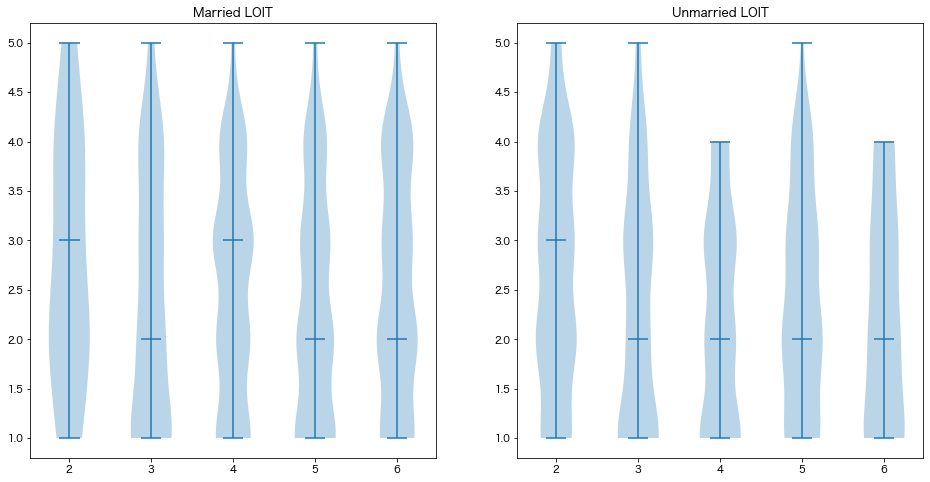

In [17]:
married_violin = []
unmarried_violin = []
cur = 1
for each in Married_Age_Catagory_LOTM:
    temp = []
    for i in Married_Age_Catagory_LOTM[each]:
        Married_Age_Catagory_LOTM[each]
        if cur == 6:
            cur = 1
        for j in range(int(i)):
            temp.append(cur)
        cur+=1
    married_violin.append(temp)

Unmarried_Age_Catagory_LOTM = Unmarried_Age_Catagory_LOTM.fillna(0)
for each in Unmarried_Age_Catagory_LOTM:
    temp = []
    for i in Unmarried_Age_Catagory_LOTM[each]:
        if cur == 6:
            cur = 1
        for j in range(int(i)):
            temp.append(cur)
        cur+=1
    unmarried_violin.append(temp)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].violinplot(married_violin,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Married LOIT')

axs[1].violinplot(unmarried_violin,
                  showmeans=False,
                  showmedians=True)
axs[1].set_title('Unmarried LOIT')

plt.setp(axs,xticks=[y + 1 for y in range(len(married_violin))],xticklabels=['2','3', '4', '5', '6'])


In [35]:
#--------ANOVA---------#
Married_Age_Catagory_LOTM[6]
Unmarried_Age_Catagory_LOTM[6] = Unmarried_Age_Catagory_LOTM[6].fillna(0)
st.f_oneway(Married_Age_Catagory_LOTM[6],Unmarried_Age_Catagory_LOTM[6])

F_onewayResult(statistic=7.138599640933577, pvalue=0.028282520128048744)

In [19]:
Married_Age_Catagory_LOTM[6]
temp1 = Married_Age_Catagory_LOTM[6]/Married_Age_Catagory_LOTM[6].sum()
temp1

LOIT
1    0.245283
2    0.287736
3    0.212264
4    0.231132
5    0.023585
Name: 6, dtype: float64

[0 1 2 3 4]
LOIT
1    0.245283
2    0.287736
3    0.212264
4    0.231132
5    0.023585
Name: 6, dtype: float64


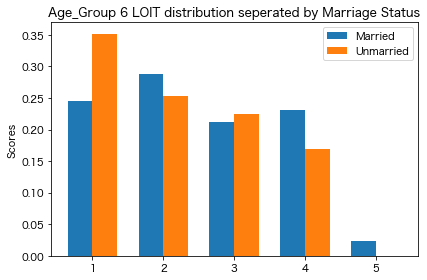

In [20]:
temp2 = Unmarried_Age_Catagory_LOTM[6]/Unmarried_Age_Catagory_LOTM[6].sum()
fig, ax = plt.subplots()
x = np.arange(len(temp1)) 
print(x)
print(temp1)
rects1 = ax.bar(x-0.35/2, temp1, 0.35,label = "Married")
rects2 = ax.bar(x+0.35/2, temp2, 0.35, label = "Unmarried")
labels = [i for i in range(1,6)]
ax.set_ylabel('Scores')
ax.set_title('Age_Group 6 LOIT distribution seperated by Marriage Status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [21]:
temp1

LOIT
1    0.245283
2    0.287736
3    0.212264
4    0.231132
5    0.023585
Name: 6, dtype: float64

In [22]:
temp2

LOIT
1    0.352113
2    0.253521
3    0.225352
4    0.169014
5    0.000000
Name: 6, dtype: float64

In [23]:
job = {0:"Salary Man",1:"Self Employed",2:"Profressional(Doctor,Laywer,etc)",3:"Civil Servent",4:"Student",5:"Housewife/Househusband",6:"Parttime",7:"Retired",8:"Others"}

In [24]:
temp_raw = survey_raw.groupby("Profession")
all_job_raw = []
for i in range(1,11):
    if i == 5:
        pass
    elif i == 10:
        all_job_raw.append(temp_raw.get_group(99))
    else:
        all_job_raw.append(temp_raw.get_group(i))
all_job_LOTM = []
for each in all_job_raw:
    all_job_LOTM.append(each.pivot_table("dummy",index = "LOIT",columns = "Age_Category" ,aggfunc = sum))

 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6')]

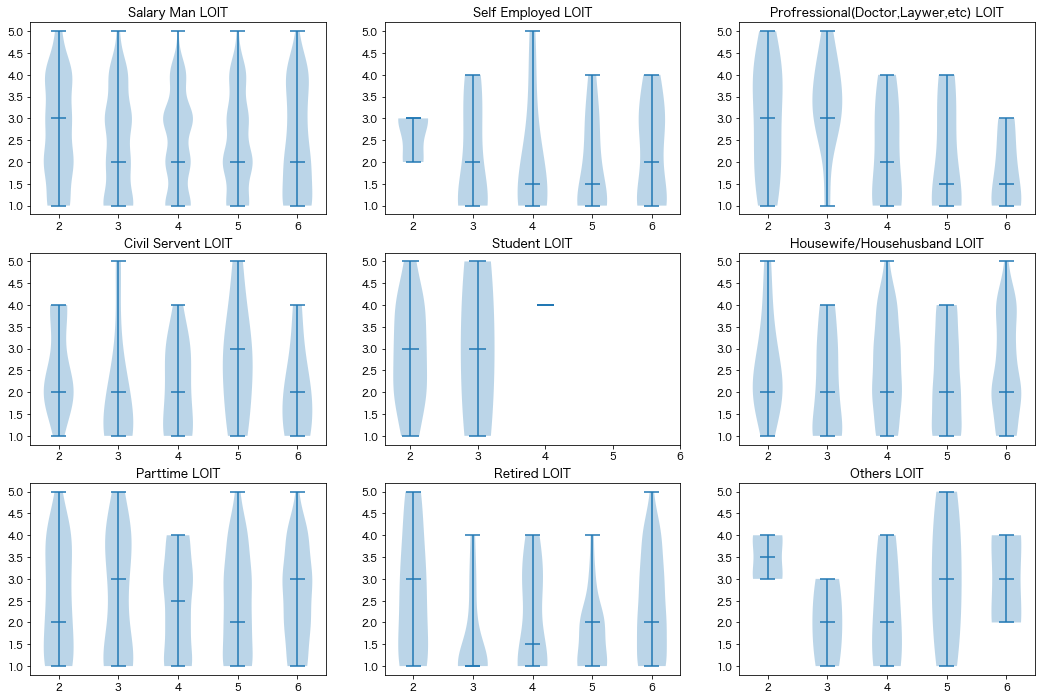

In [25]:
all_violin_master = []
cur = 1

for each_pos_LOTM in all_job_LOTM:
    each_pos_LOTM = each_pos_LOTM.fillna(0)
    all_violin = []
    for each in each_pos_LOTM:
        temp = []
        for i in each_pos_LOTM[each]:
            if cur == 6:
                cur = 1
            for j in range(int(i)):
                temp.append(cur)
            cur+=1
        all_violin.append(temp)
        
    all_violin_master.append(all_violin)


# for each in Unmarried_Age_Catagory_LOTM:
#     temp = []
#     for i in Unmarried_Age_Catagory_LOTM[each]:
#         if cur == 6:
#             cur = 1
#         for j in range(i):
#             temp.append(cur)
#         cur+=1
#     unmarried_violin.append(temp)
    
xlabel = ["2","3","4","5","6"]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
counter = 0
for i in range(3):
    for j in range(3):
        axs[i][j].violinplot(all_violin_master[counter],
                          showmeans=False,
                          showmedians=True)
        axs[i][j].set_title('{} LOIT'.format(job[counter] ))
        counter+=1


# axs[1].violinplot(male_violin,
#                   showmeans=False,
#                   showmedians=True)


plt.setp(axs,xticks=[y + 1 for y in range(len(married_violin))],xticklabels=['2','3', '4', '5', '6'])